In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('crop_recommendation_New.csv')
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Crop
0,49,58,44,25.979909,41.973170,6.234028,49.359671,Pulses
1,80,63,60,25.213380,64.161452,5.824701,147.893690,Maize
2,79,35,61,23.545550,43.668090,6.608484,91.485386,Cotton
3,74,46,86,29.565941,42.789877,6.584289,81.981711,Cotton
4,82,86,86,22.557862,71.301032,6.923328,245.532164,Banana
...,...,...,...,...,...,...,...,...
5995,48,60,46,24.915444,43.918749,6.350202,109.785060,Groundnut
5996,89,48,60,18.238513,57.616516,6.716070,116.091776,Maize
5997,35,49,55,16.582366,36.642888,7.041350,72.876334,Pulses
5998,97,64,43,32.616486,83.813882,6.157233,216.131550,Rice


In [2]:
df.shape

(6000, 8)

In [3]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Crop
0,49,58,44,25.979909,41.973170,6.234028,49.359671,Pulses
1,80,63,60,25.213380,64.161452,5.824701,147.893690,Maize
2,79,35,61,23.545550,43.668090,6.608484,91.485386,Cotton
3,74,46,86,29.565941,42.789877,6.584289,81.981711,Cotton
4,82,86,86,22.557862,71.301032,6.923328,245.532164,Banana


In [4]:
df.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Crop
5995,48,60,46,24.915444,43.918749,6.350202,109.785060,Groundnut
5996,89,48,60,18.238513,57.616516,6.716070,116.091776,Maize
5997,35,49,55,16.582366,36.642888,7.041350,72.876334,Pulses
5998,97,64,43,32.616486,83.813882,6.157233,216.131550,Rice
5999,95,41,67,16.228202,45.146599,6.291123,108.884829,Wheat


In [5]:
df.dtypes

Nitrogen         int64
Phosphorus       int64
Potassium        int64
Temperature    float64
Humidity       float64
pH             float64
Rainfall       float64
Crop            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     6000 non-null   int64  
 1   Phosphorus   6000 non-null   int64  
 2   Potassium    6000 non-null   int64  
 3   Temperature  6000 non-null   float64
 4   Humidity     6000 non-null   float64
 5   pH           6000 non-null   float64
 6   Rainfall     6000 non-null   float64
 7   Crop         6000 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 375.1+ KB


In [7]:
df['Crop'].unique()

array(['Pulses', 'Maize', 'Cotton', 'Banana', 'Wheat', 'Groundnut',
       'Rice', 'Sugarcane'], dtype=object)

In [8]:
df.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH             0
Rainfall       0
Crop           0
dtype: int64

In [9]:
df1=df['Crop'].value_counts()
df1

Crop
Rice         779
Groundnut    766
Cotton       756
Wheat        752
Banana       742
Sugarcane    739
Pulses       737
Maize        729
Name: count, dtype: int64

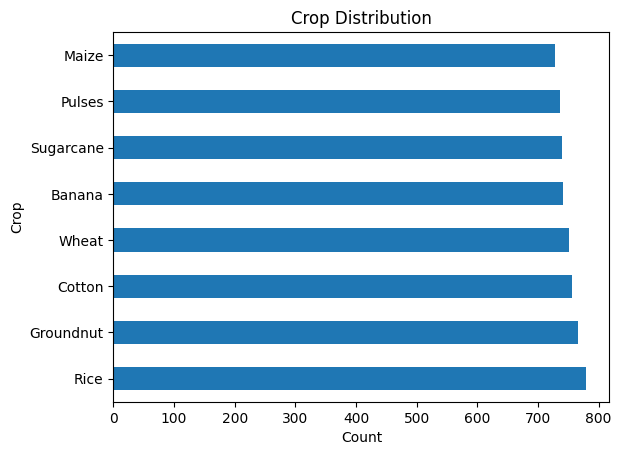

In [10]:
#Visualization
plt.figure()
df1.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Crop')
plt.title('Crop Distribution')
plt.show()
#

In [11]:
#Check Duplicates
df.duplicated().sum()


np.int64(0)

In [12]:
df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH',
       'Rainfall', 'Crop'],
      dtype='object')

In [13]:
# Outlier Detection
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

numeric_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH', 'Rainfall']

for col in numeric_columns:
    df = remove_outliers_iqr(df, col)

print("Dataset shape after outlier removal:", df.shape)

Dataset shape after outlier removal: (5710, 8)


In [14]:
#X & Y seperation
X =df.iloc[:,:-1]
Y=df.iloc[:,-1]


In [15]:
X

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,49,58,44,25.979909,41.973170,6.234028,49.359671
1,80,63,60,25.213380,64.161452,5.824701,147.893690
2,79,35,61,23.545550,43.668090,6.608484,91.485386
3,74,46,86,29.565941,42.789877,6.584289,81.981711
4,82,86,86,22.557862,71.301032,6.923328,245.532164
...,...,...,...,...,...,...,...
5995,48,60,46,24.915444,43.918749,6.350202,109.785060
5996,89,48,60,18.238513,57.616516,6.716070,116.091776
5997,35,49,55,16.582366,36.642888,7.041350,72.876334
5998,97,64,43,32.616486,83.813882,6.157233,216.131550


In [16]:
Y

0          Pulses
1           Maize
2          Cotton
3          Cotton
4          Banana
          ...    
5995    Groundnut
5996        Maize
5997       Pulses
5998         Rice
5999        Wheat
Name: Crop, Length: 5710, dtype: object

In [17]:
# Encode target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Crop"] = le.fit_transform(df["Crop"])


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, test_size=0.2, random_state=42
)
X_train

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
2829,47,60,63,26.594797,41.184969,6.957604,58.867048
4660,75,43,66,23.738166,42.006609,6.902877,95.382765
5865,42,42,52,23.942748,49.028695,6.764610,83.257878
228,100,54,40,25.496923,77.923454,6.195467,208.283715
4501,68,34,82,33.587720,43.187862,6.658442,87.878419
...,...,...,...,...,...,...,...
3948,117,77,100,23.624942,74.134706,6.095289,231.786462
5440,82,46,46,21.987902,41.311530,6.748153,73.410318
5476,47,38,34,28.749001,30.848702,7.203271,48.210065
5658,60,61,66,26.045865,59.782632,6.986298,86.593486


In [20]:
X_test

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
1777,91,69,72,21.674562,79.172098,6.196993,299.632233
2606,87,54,53,15.810896,55.379357,6.211972,111.932984
586,96,66,105,22.340537,86.691819,6.037502,238.676018
5898,33,50,52,26.868643,39.892541,7.418191,59.417890
5532,87,70,82,28.525101,85.551758,6.572685,190.179647
...,...,...,...,...,...,...,...
2882,50,49,57,28.313763,49.804029,6.246371,80.440612
837,87,57,71,28.197147,55.587303,7.044994,98.461491
894,97,65,59,32.295155,84.983758,6.317147,176.517074
3102,74,42,67,18.411980,54.071069,6.062404,126.852849


In [21]:

# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier(
    n_estimators=200,
    random_state=1,class_weight='balanced'
)

# Train model
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

In [22]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     "n_estimators": [200, 300, 400],
#     "max_depth": [10, 20, None]
# }

# grid = GridSearchCV(
#     RandomForestClassifier(),
#     params,
#     cv=5,
#     scoring="accuracy"
# )

# grid.fit(X_train, y_train)


In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 89,   0,   0,   0,   0,   0,   0,   0],
       [  0, 142,   3,   0,   0,   0,   0,   6],
       [  0,   0, 153,   0,   5,   0,   0,   0],
       [  0,   1,   0, 142,   0,   0,   1,   6],
       [  0,   0,   8,   0, 146,   0,   0,   0],
       [  0,   0,   0,   0,   0, 143,  10,   0],
       [  0,   0,   0,   0,   0,  16, 143,   0],
       [  0,   0,  11,   7,   0,   0,   0, 110]])

In [24]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
ac

93.52014010507881

In [25]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9352014010507881
              precision    recall  f1-score   support

      Banana       1.00      1.00      1.00        89
      Cotton       0.99      0.94      0.97       151
   Groundnut       0.87      0.97      0.92       158
       Maize       0.95      0.95      0.95       150
      Pulses       0.97      0.95      0.96       154
        Rice       0.90      0.93      0.92       153
   Sugarcane       0.93      0.90      0.91       159
       Wheat       0.90      0.86      0.88       128

    accuracy                           0.94      1142
   macro avg       0.94      0.94      0.94      1142
weighted avg       0.94      0.94      0.94      1142



In [26]:
import joblib
joblib.dump(model, "model.pkl")
joblib.dump(le, "label_encoder.pkl")
joblib.dump(scaler, open('scaler.pkl', 'wb'))
print("✅ Crop Recommendation Model Saved")

✅ Crop Recommendation Model Saved
